In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [311]:
test_df = pd.read_csv("../Data/train.csv")
test_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [312]:
test_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Filling Missing Values

In [313]:
test_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Since age is missing quite a lot of values, then we are going to fill NAs using the ``embarked`` and ``sex`` variables

In [314]:
male_age_in_c = test_df[(test_df["Sex"] == "male") & (~test_df["Age"].isna())].groupby("Embarked").mean().loc["C","Age"]
male_age_in_q = test_df[(test_df["Sex"] == "male") & (~test_df["Age"].isna())].groupby("Embarked").mean().loc["Q","Age"]
male_age_in_s = test_df[(test_df["Sex"] == "male") & (~test_df["Age"].isna())].groupby("Embarked").mean().loc["S","Age"]
female_age_in_c = test_df[(test_df["Sex"] == "female") & (~test_df["Age"].isna())].groupby("Embarked").mean().loc["C","Age"]
female_age_in_q = test_df[(test_df["Sex"] == "female") & (~test_df["Age"].isna())].groupby("Embarked").mean().loc["Q","Age"]
female_age_in_s = test_df[(test_df["Sex"] == "female") & (~test_df["Age"].isna())].groupby("Embarked").mean().loc["S","Age"]

In [315]:
test_df["Age"] = test_df["Age"].mask((test_df["Sex"] == "male") & (test_df["Age"].isna()) & (test_df["Embarked"]=="C"), test_df["Age"].fillna(male_age_in_c))
test_df["Age"] = test_df["Age"].mask((test_df["Sex"] == "male") & (test_df["Age"].isna()) & (test_df["Embarked"]=="Q"), test_df["Age"].fillna(male_age_in_q))
test_df["Age"] = test_df["Age"].mask((test_df["Sex"] == "male") & (test_df["Age"].isna()) & (test_df["Embarked"]=="S"), test_df["Age"].fillna(male_age_in_s))
test_df["Age"] = test_df["Age"].mask((test_df["Sex"] == "female") & (test_df["Age"].isna()) & (test_df["Embarked"]=="C"), test_df["Age"].fillna(female_age_in_c))
test_df["Age"] = test_df["Age"].mask((test_df["Sex"] == "female") & (test_df["Age"].isna()) & (test_df["Embarked"]=="Q"), test_df["Age"].fillna(female_age_in_q))
test_df["Age"] = test_df["Age"].mask((test_df["Sex"] == "female") & (test_df["Age"].isna()) & (test_df["Embarked"]=="S"), test_df["Age"].fillna(female_age_in_s))

In [316]:
test_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Since the variable ``Cabin`` is missing most values, then it's going to be dropped as most rows don't have any info regarding this dimension

In [317]:
test_df.drop("Cabin",axis=1, inplace=True)

And also the ``Name`` because identifying the passengers is not relevant

In [318]:
test_df.drop("Name",axis=1, inplace=True)

In [319]:
test_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

For ``Embarked`` let's find people with similar features and where they have embarked

In [320]:
test_df[test_df["Embarked"].isna()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,female,38.0,0,0,113572,80.0,NaN
829,830,1,1,female,62.0,0,0,113572,80.0,NaN


In [321]:
test_df[(test_df["Survived"] == 1) \
        & (test_df["Pclass"] == 1) \
        & (test_df["Sex"] == "female") \
        & ((test_df["Fare"] >= 60) & (test_df["Fare"] <= 90)) \
        & (test_df["SibSp"] == 0) \
        & (test_df["Parch"] == 0)]["Embarked"].value_counts()

C    5
S    5
Name: Embarked, dtype: int64

In [322]:
"Survived","Pclass","Sex","Fare","SibSp","Parch"

('Survived', 'Pclass', 'Sex', 'Fare', 'SibSp', 'Parch')

Since, people with similar features have embarked from both ``Cherbourg`` and ``Southampton`` equally, then we are going to assign the first one to ``C`` and the other to ``S``

In [323]:
test_df["Embarked"] = test_df["Embarked"].mask(test_df["PassengerId"]==62,test_df["Embarked"].fillna("C"))
test_df["Embarked"] = test_df["Embarked"].mask(test_df["PassengerId"]==830,test_df["Embarked"].fillna("S"))
test_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [324]:
test_df.drop("Ticket",axis=1, inplace=True)
test_df.drop("PassengerId",axis=1, inplace=True)
test_df["Embarked"] = test_df["Embarked"].astype("category").cat.codes.values.reshape(-1,1)
test_df["Sex"] = test_df["Sex"].astype("category").cat.codes.values.reshape(-1,1)
test_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,27.771505,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [325]:
test_df.dtypes

Survived      int64
Pclass        int64
Sex            int8
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked       int8
dtype: object

# Exploratory Data Analysis

First, let's check if there's enough statistical significance to believe there's a dependency relationship between our categorical columns and the target

In [326]:
from sklearn.feature_selection import chi2

categorical_cols = ["Sex", "Embarked", "Pclass","SibSp", "Parch"]
chi_2_test = chi2(test_df[categorical_cols], test_df["Survived"])

In [327]:
pd.DataFrame(chi_2_test, columns=categorical_cols, index=["chi2","p-value"])

,Sex,Embarked,Pclass,SibSp,Parch
chi2,9.270245e+01,10.660296,3.087370e+01,2.581865,10.097499
p-value,6.077838e-22,0.001095,2.753786e-08,0.108094,0.001485


Now, let's check how much they help find a decision boundary between the different target classes

<AxesSubplot:>

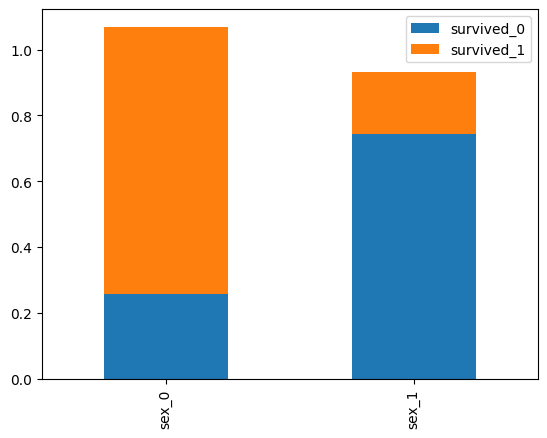

In [328]:
sex_0_cat_total = pd.crosstab(test_df["Sex"],test_df["Survived"]).loc[0].sum()
sex_1_cat_total = pd.crosstab(test_df["Sex"],test_df["Survived"]).loc[1].sum()
sex_0_cat_perc = np.true_divide(pd.crosstab(test_df["Sex"],test_df["Survived"]).loc[0], sex_0_cat_total) 
sex_1_cat_perc = np.true_divide(pd.crosstab(test_df["Sex"],test_df["Survived"]).loc[1], sex_1_cat_total) 

pd.DataFrame(zip(sex_0_cat_perc,sex_1_cat_perc), columns = ["survived_0","survived_1"], index = ["sex_0","sex_1"]).plot(kind="bar", stacked=True)

<AxesSubplot:>

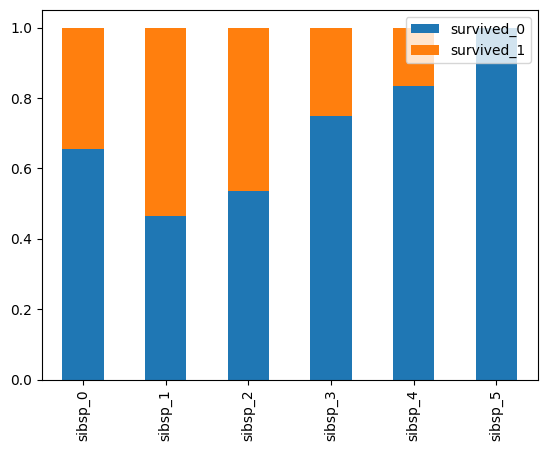

In [329]:
sibsp_0_cat_total = pd.crosstab(test_df["SibSp"],test_df["Survived"]).loc[0].sum()
sibsp_1_cat_total = pd.crosstab(test_df["SibSp"],test_df["Survived"]).loc[1].sum()
sibsp_2_cat_total = pd.crosstab(test_df["SibSp"],test_df["Survived"]).loc[2].sum()
sibsp_3_cat_total = pd.crosstab(test_df["SibSp"],test_df["Survived"]).loc[3].sum()
sibsp_4_cat_total = pd.crosstab(test_df["SibSp"],test_df["Survived"]).loc[4].sum()
sibsp_5_cat_total = pd.crosstab(test_df["SibSp"],test_df["Survived"]).loc[5].sum()
sibsp_0_cat_perc = np.true_divide(pd.crosstab(test_df["SibSp"],test_df["Survived"]).loc[0], sibsp_0_cat_total) 
sibsp_1_cat_perc = np.true_divide(pd.crosstab(test_df["SibSp"],test_df["Survived"]).loc[1], sibsp_1_cat_total)
sibsp_2_cat_perc = np.true_divide(pd.crosstab(test_df["SibSp"],test_df["Survived"]).loc[2], sibsp_2_cat_total)
sibsp_3_cat_perc = np.true_divide(pd.crosstab(test_df["SibSp"],test_df["Survived"]).loc[3], sibsp_3_cat_total)
sibsp_4_cat_perc = np.true_divide(pd.crosstab(test_df["SibSp"],test_df["Survived"]).loc[4], sibsp_4_cat_total)
sibsp_5_cat_perc = np.true_divide(pd.crosstab(test_df["SibSp"],test_df["Survived"]).loc[5], sibsp_5_cat_total)
data = np.array(list(zip(sibsp_0_cat_perc,
                    sibsp_1_cat_perc,
                    sibsp_2_cat_perc,
                    sibsp_3_cat_perc,
                    sibsp_4_cat_perc,
                    sibsp_5_cat_perc,
                    ))).T
pd.DataFrame(data, columns = ["survived_0","survived_1"], index = ["sibsp_0","sibsp_1","sibsp_2","sibsp_3","sibsp_4","sibsp_5"]).plot(kind="bar", stacked=True)

<AxesSubplot:>

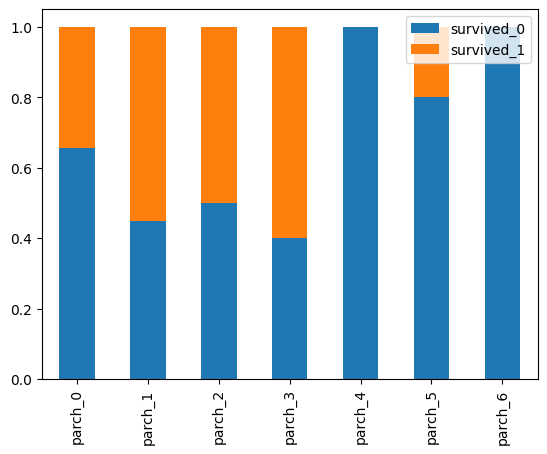

In [330]:
parch_0_cat_total = pd.crosstab(test_df["Parch"],test_df["Survived"]).loc[0].sum()
parch_1_cat_total = pd.crosstab(test_df["Parch"],test_df["Survived"]).loc[1].sum()
parch_2_cat_total = pd.crosstab(test_df["Parch"],test_df["Survived"]).loc[2].sum()
parch_3_cat_total = pd.crosstab(test_df["Parch"],test_df["Survived"]).loc[3].sum()
parch_4_cat_total = pd.crosstab(test_df["Parch"],test_df["Survived"]).loc[4].sum()
parch_5_cat_total = pd.crosstab(test_df["Parch"],test_df["Survived"]).loc[5].sum()
parch_6_cat_total = pd.crosstab(test_df["Parch"],test_df["Survived"]).loc[6].sum()
parch_0_cat_perc = np.true_divide(pd.crosstab(test_df["Parch"],test_df["Survived"]).loc[0], parch_0_cat_total) 
parch_1_cat_perc = np.true_divide(pd.crosstab(test_df["Parch"],test_df["Survived"]).loc[1], parch_1_cat_total)
parch_2_cat_perc = np.true_divide(pd.crosstab(test_df["Parch"],test_df["Survived"]).loc[2], parch_2_cat_total)
parch_3_cat_perc = np.true_divide(pd.crosstab(test_df["Parch"],test_df["Survived"]).loc[3], parch_3_cat_total)
parch_4_cat_perc = np.true_divide(pd.crosstab(test_df["Parch"],test_df["Survived"]).loc[4], parch_4_cat_total)
parch_5_cat_perc = np.true_divide(pd.crosstab(test_df["Parch"],test_df["Survived"]).loc[5], parch_5_cat_total)
parch_6_cat_perc = np.true_divide(pd.crosstab(test_df["Parch"],test_df["Survived"]).loc[6], parch_6_cat_total)
data = np.array(list(zip(parch_0_cat_perc,
                    parch_1_cat_perc,
                    parch_2_cat_perc,
                    parch_3_cat_perc,
                    parch_4_cat_perc,
                    parch_5_cat_perc,
                    parch_6_cat_perc,
                    ))).T
pd.DataFrame(data, columns = ["survived_0","survived_1"], index = ["parch_0","parch_1","parch_2","parch_3","parch_4","parch_5","parch_6"]).plot(kind="bar", stacked=True)

<AxesSubplot:>

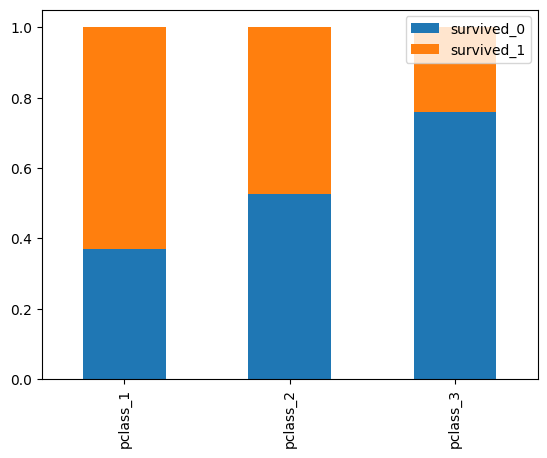

In [331]:
pclass_1_cat_total = pd.crosstab(test_df["Pclass"],test_df["Survived"]).loc[1].sum()
pclass_2_cat_total = pd.crosstab(test_df["Pclass"],test_df["Survived"]).loc[2].sum()
pclass_3_cat_total = pd.crosstab(test_df["Pclass"],test_df["Survived"]).loc[3].sum()
pclass_1_cat_perc = np.true_divide(pd.crosstab(test_df["Pclass"],test_df["Survived"]).loc[1], pclass_1_cat_total) 
pclass_2_cat_perc = np.true_divide(pd.crosstab(test_df["Pclass"],test_df["Survived"]).loc[2], pclass_2_cat_total)
pclass_3_cat_perc = np.true_divide(pd.crosstab(test_df["Pclass"],test_df["Survived"]).loc[3], pclass_3_cat_total)
data = np.array(list(zip(pclass_1_cat_perc,pclass_2_cat_perc,pclass_3_cat_perc))).T
pd.DataFrame(data, columns = ["survived_0","survived_1"], index = ["pclass_1","pclass_2","pclass_3"]).plot(kind="bar", stacked=True)

<AxesSubplot:>

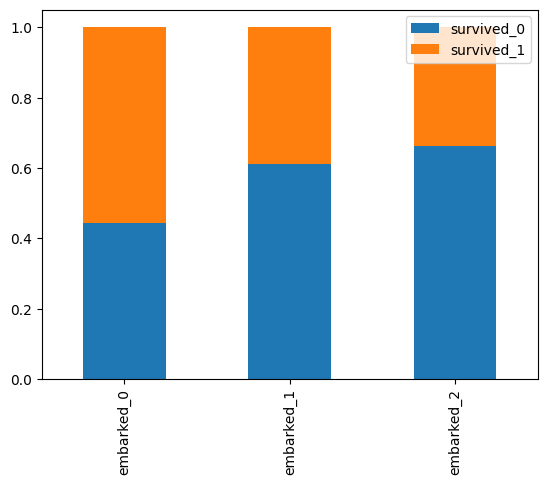

In [332]:
embarked_0_cat_total = pd.crosstab(test_df["Embarked"],test_df["Survived"]).loc[0].sum()
embarked_1_cat_total = pd.crosstab(test_df["Embarked"],test_df["Survived"]).loc[1].sum()
embarked_2_cat_total = pd.crosstab(test_df["Embarked"],test_df["Survived"]).loc[2].sum()
embarked_0_cat_perc = np.true_divide(pd.crosstab(test_df["Embarked"],test_df["Survived"]).loc[0], embarked_0_cat_total) 
embarked_1_cat_perc = np.true_divide(pd.crosstab(test_df["Embarked"],test_df["Survived"]).loc[1], embarked_1_cat_total)
embarked_2_cat_perc = np.true_divide(pd.crosstab(test_df["Embarked"],test_df["Survived"]).loc[2], embarked_2_cat_total)
data = np.array(list(zip(embarked_0_cat_perc,embarked_1_cat_perc,embarked_2_cat_perc))).T
pd.DataFrame(data, columns = ["survived_0","survived_1"], index = ["embarked_0","embarked_1","embarked_2"]).plot(kind="bar", stacked=True)

One can see that ``Embarked`` helps differentiate the target a little bit less (but still does the job!) which lines up with the fact that we got a higher p-value compared to ``Sex`` and ``Pclass``

Now, for the continuous variables, let's choose the least correlated variables to analyze their boxplot

In [333]:
continuous_features = test_df.columns[~test_df.columns.isin(categorical_cols+["Survived"])]
test_df[continuous_features].corr().abs().mean(axis=0).sort_values().head().index[:5]

Index(['Age', 'Fare'], dtype='object')

<AxesSubplot:title={'center':'Age'}, xlabel='[Survived]'>

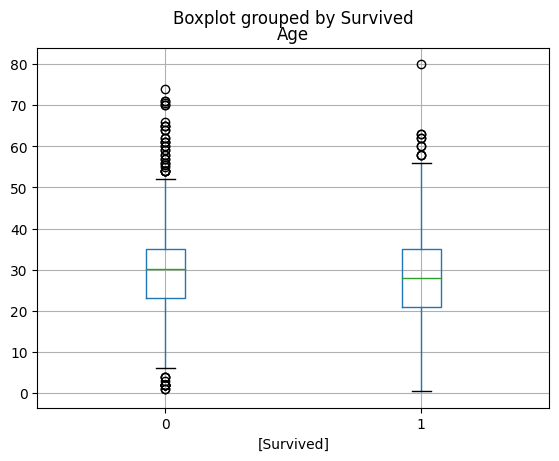

In [334]:
test_df.boxplot(column=["Age"], by = ["Survived"])

As we can see, age doesn't really help differentiate the target, so it can be dropped

<AxesSubplot:title={'center':'Fare'}, xlabel='[Survived]'>

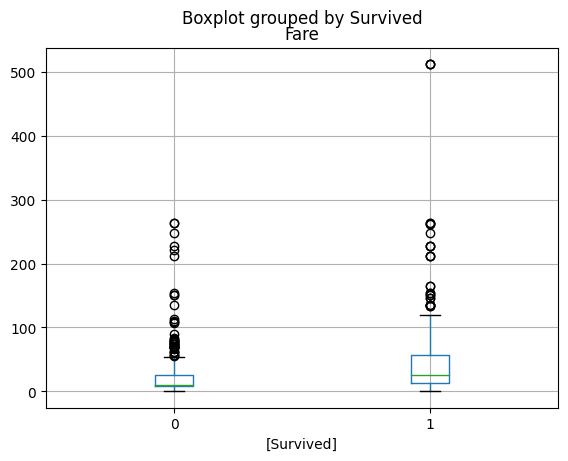

In [335]:
test_df.boxplot(column=["Fare"], by = ["Survived"])

The continuous variables don't look like they help differentiate the target

Let's check the correlations to take the least correlated features

In [349]:
test_df.corr().abs()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,0.338481,0.543351,0.087648,0.035322,0.081629,0.257307,0.170943
Pclass,0.338481,1.000000,0.131900,0.334712,0.083081,0.018443,0.549500,0.166223
Sex,0.543351,0.131900,1.000000,0.114850,0.114631,0.245489,0.182333,0.111894
Age,0.087648,0.334712,0.114850,1.000000,0.236608,0.180701,0.091690,0.033721
SibSp,0.035322,0.083081,0.114631,0.236608,1.000000,0.414838,0.159651,0.069444
Parch,0.081629,0.018443,0.245489,0.180701,0.414838,1.000000,0.216225,0.041064
Fare,0.257307,0.549500,0.182333,0.091690,0.159651,0.216225,1.000000,0.227015
Embarked,0.170943,0.166223,0.111894,0.033721,0.069444,0.041064,0.227015,1.000000


In [348]:
test_df.corr().abs()[test_df.corr().abs() < 1].describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.216383,0.231763,0.206350,0.154276,0.159082,0.171198,0.240531,0.117186
std,0.179383,0.184763,0.156486,0.103665,0.130719,0.138617,0.146401,0.073513
min,0.035322,0.018443,0.111894,0.033721,0.035322,0.018443,0.091690,0.033721
25%,0.084639,0.107491,0.114740,0.089669,0.076262,0.061347,0.170992,0.055254
50%,0.170943,0.166223,0.131900,0.114850,0.114631,0.180701,0.216225,0.111894
75%,0.297894,0.336597,0.213911,0.208655,0.198129,0.230857,0.242161,0.168583
max,0.543351,0.549500,0.543351,0.334712,0.414838,0.414838,0.549500,0.227015


As one can see, ``Fare`` and ``Pclass`` are correlated because the higher the class, the more expensive the ticket

Before deciding which features to use, let's use RFE to check which variables are useful for models

In [370]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier

X = test_df[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]].values
Y = test_df["Survived"].values
# define the method
rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5, step=1)
rfe.fit_transform(X,Y)

array([[ 3.        ,  1.        , 22.        ,  1.        ,  7.25      ],
       [ 1.        ,  0.        , 38.        ,  1.        , 71.2833    ],
       [ 3.        ,  0.        , 26.        ,  0.        ,  7.925     ],
       ...,
       [ 3.        ,  0.        , 27.77150538,  1.        , 23.45      ],
       [ 1.        ,  1.        , 26.        ,  0.        , 30.        ],
       [ 3.        ,  1.        , 32.        ,  0.        ,  7.75      ]])

In [371]:
rfe.ranking_

array([1, 1, 1, 1, 3, 1, 2])

for the target model, ``Pclass``, ``Sex``, ``Age``, ``SibSp`` and ``Fare`` are important

In summary, the features that we are going to use are:

* Sex
* Age
* SibSp
* Pclass
* Embarked
* Parch
* Fare

# Model Creation

In [388]:
X = ["Sex", "Pclass","Age","SibSp","Parch","Fare"]
continuous_features = ["Age","Fare"]
categorical_features = ["Sex","Pclass","Embarked","Parch","SibSp"]
Y = ["Survived"]

In [389]:
from sklearn.base import BaseEstimator, TransformerMixin

class WithinGroupMeanImputer(BaseEstimator, TransformerMixin):
    def __init__(self, target=None, group_vars=None):
        self.target = target
        self.group_vars = group_vars
    
    def fit(self, X, y=None):
        return self
        
    def transform(self, X, y=None):
        # the copy leaves the original dataframe intact
        X_ = X.copy()
        na_rows = X_[(X[self.target].isna())].index.tolist()
        for row in na_rows:
            query_str = f" {self.target} == {self.target} &"
            for i, group_by_col in enumerate(self.group_vars):
                row_col_value = X_.loc[row,:][group_by_col]
                if X_.dtypes[group_by_col] == "object":
                    row_col_value = f"'{row_col_value}'"

                if i == (len(self.group_vars)-1):
                    query_str += f" {group_by_col}=={row_col_value}"
                else:
                    query_str += f" {group_by_col}=={row_col_value} &"

            value_to_imput = np.nan
            if X_.dtypes[self.target] == "object":
                value_to_imput = X_.query(query_str)[self.target].value_counts().sort_values(ascending=False).values.tolist()[0]
            else:
                value_to_imput = X_.query(query_str)[self.target].mean()

            try:
                X_.loc[row,(self.target,)] = value_to_imput
            except:
                X_.loc[row,(self.target,)] = np.nan

        return X_
    
class columnDropperTransformer(BaseEstimator, TransformerMixin):
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None):
        return self 

we create a pipeline for doing all the EDA steps

In [590]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer, OneHotEncoder
from scipy.sparse.csr import csr_matrix

raw_train_df = pd.read_csv("../Data/train.csv")

norm = Normalizer()
encoder = OneHotEncoder()

data_transformers = ColumnTransformer([
    ("norm", norm, continuous_features),
    ('encoder', encoder, categorical_features),
    ], remainder='passthrough')

clf = Pipeline(steps=[
    ("cabin_dropper", columnDropperTransformer(columns=["Cabin","Ticket","Name","PassengerId"])),
    ("age_imputer", WithinGroupMeanImputer(target="Age",group_vars=["Sex"])),
    ("fare_imputer", WithinGroupMeanImputer(target="Fare",group_vars=["Pclass","Sex","SibSp","Parch"])),
    ("data_transformers",data_transformers)
    
])

data = clf.fit_transform(raw_train_df)
encoder_columns = clf.named_steps['data_transformers'].transformers_[1][1].get_feature_names(categorical_features).tolist()
train_df = pd.DataFrame(data.toarray().tolist() if isinstance(data, csr_matrix) else data , columns=continuous_features+encoder_columns+Y) # remove Y for test
train_df

c:\Users\Edsel Di Meo\Documents\Python Projects\TitanicKaggle\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Age,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,...,Parch_5,Parch_6,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Survived
0,0.949757,0.312988,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.470417,0.882444,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.956551,0.291564,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.550338,0.834942,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.974555,0.224148,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.901002,0.433816,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
887,0.535052,0.844819,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0.765694,0.643205,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
889,0.654931,0.755689,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


let's use grid search for parameter tuning

In [591]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

X = train_df[continuous_features+encoder_columns].values
target = train_df[Y]
gbt = GradientBoostingClassifier()
gsv = GridSearchCV(gbt,cv=10,param_grid={
    "min_samples_split":[5,8,9],
    "min_samples_leaf":[3,4],
    "max_depth":[5,6,7]
}, scoring="roc_auc")
gsv.fit(X,target)
gsv.best_params_

c:\Users\Edsel Di Meo\Documents\Python Projects\TitanicKaggle\.venv\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Edsel Di Meo\Documents\Python Projects\TitanicKaggle\.venv\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Edsel Di Meo\Documents\Python Projects\TitanicKaggle\.venv\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Edsel Di Meo\Documents\Python Projects\TitanicKaggle\.venv\lib\site-packages\sk

{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 9}

In [592]:
gsv.best_score_

0.8442676626206038

Let's find an optimal threshold using ROC curves

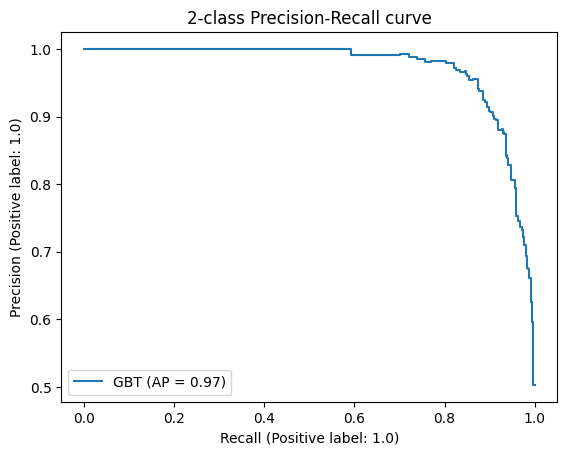

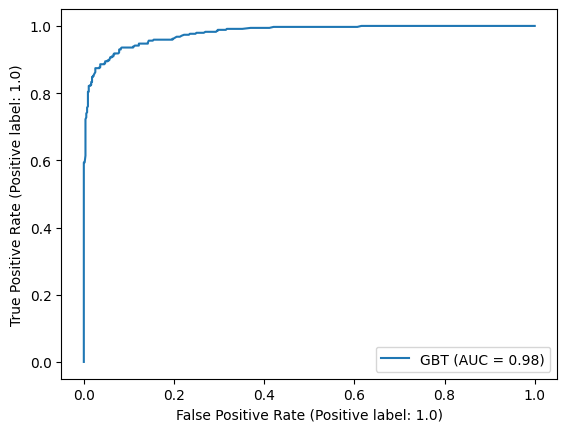

In [593]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

display = PrecisionRecallDisplay.from_estimator(
    gsv.best_estimator_, X, target, name="GBT", 
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

display = RocCurveDisplay.from_estimator(
    gsv.best_estimator_, X, target, name="GBT", 
)

In [594]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(raw_train_df["Survived"],gsv.best_estimator_.predict_proba(X)[:,1],pos_label=1)
roc_thresholds_df = pd.DataFrame(zip(fpr,tpr,thresholds), columns=["fpr","tpr","thresholds"])

fpr, tpr, thresholds = metrics.roc_curve(raw_train_df["Survived"],gsv.best_estimator_.predict_proba(X)[:,1],pos_label=1)
roc_thresholds_df = pd.DataFrame(zip(fpr,tpr,thresholds), columns=["precision","recall","thresholds"])

In [595]:
most_optimal_threshold = roc_thresholds_df[(roc_thresholds_df["recall"] > 0.65) & (roc_thresholds_df["recall"] < 0.70)].sort_values("recall",ascending=False)["thresholds"].values[0]

In [596]:
pred_y = (gsv.best_estimator_.predict_proba(X)[:,1] >= most_optimal_threshold).astype(bool).astype(int)
metric_report = metrics.classification_report(raw_train_df["Survived"],pred_y, output_dict=True)
metric_report["threshold"] = most_optimal_threshold
metric_report

{'0': {'precision': 0.832572298325723,
  'recall': 0.9963570127504554,
  'f1-score': 0.9071310116086235,
  'support': 549},
 '1': {'precision': 0.9914529914529915,
  'recall': 0.6783625730994152,
  'f1-score': 0.8055555555555556,
  'support': 342},
 'accuracy': 0.8742985409652076,
 'macro avg': {'precision': 0.9120126448893573,
  'recall': 0.8373597929249352,
  'f1-score': 0.8563432835820896,
  'support': 891},
 'weighted avg': {'precision': 0.8935568067988159,
  'recall': 0.8742985409652076,
  'f1-score': 0.868142452719567,
  'support': 891},
 'threshold': 0.7525541667834428}

let's finish by saving both the model and the threshold summary metrics

In [597]:
import json
from joblib import dump, load

dump(gsv.best_estimator_,"../Data/first_best_model.joblib")

with open("../Data/metric_report.json","w") as f:
    json.dump(metric_report, fp=f)

Now, let's work with the test dataset

In [598]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer, OneHotEncoder
from scipy.sparse.csr import csr_matrix

raw_test_df = pd.read_csv("../Data/test.csv")

norm = Normalizer()
encoder = OneHotEncoder()

data_transformers = ColumnTransformer([
    ("norm", norm, continuous_features),
    ('encoder', encoder, categorical_features),
    ], remainder='passthrough')

clf = Pipeline(steps=[
    ("cabin_dropper", columnDropperTransformer(columns=["Cabin","Ticket","Name","PassengerId"])),
    ("age_imputer", WithinGroupMeanImputer(target="Age",group_vars=["Sex"])),
    ("fare_imputer", WithinGroupMeanImputer(target="Fare",group_vars=["Pclass","Sex","SibSp","Parch"])),
    ("data_transformers",data_transformers)
    
])

data = clf.fit_transform(raw_test_df)
encoder_columns = clf.named_steps['data_transformers'].transformers_[1][1].get_feature_names(categorical_features).tolist()
test_df = pd.DataFrame(data.toarray().tolist() if isinstance(data, csr_matrix) else data , columns=continuous_features+encoder_columns) # remove Y for test
test_df

c:\Users\Edsel Di Meo\Documents\Python Projects\TitanicKaggle\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Age,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,...,Parch_5,Parch_6,Parch_9,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,0.975204,0.221306,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.989090,0.147311,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.988012,0.154377,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.952194,0.305495,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.873055,0.487621,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.966415,0.256985,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
414,0.337158,0.941448,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
415,0.982727,0.185059,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
416,0.966415,0.256985,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [599]:
import json
from joblib import dump, load

gbt = load("../Data/first_best_model.joblib")
with open("../Data/metric_report.json","r") as f:
    metric_report = json.load(fp=f)

X = test_df[continuous_features+encoder_columns].values
predictions = (gbt.predict_proba(X)[:,1] >= most_optimal_threshold).astype(bool).astype(int)

In [600]:
raw_test_df["Survived"] = predictions
raw_test_df[["PassengerId","Survived"]].to_csv("../Data/prediction_results.csv",index=False)